<a href="https://colab.research.google.com/github/AlexanderYevdokymenko/Machine-learning/blob/main/%D0%84%D0%B2%D0%B4%D0%BE%D0%BA%D0%B8%D0%BC%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9F%D0%A0%E2%84%965_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82%E2%84%9610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1 Завдання
# Імпорт необхідних бібліотек
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Завантаження датасету
iris = datasets.load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Роздрук перших 5 рядків датасету
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


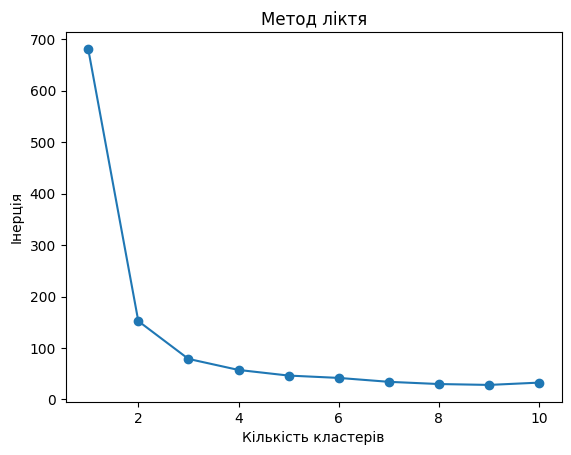

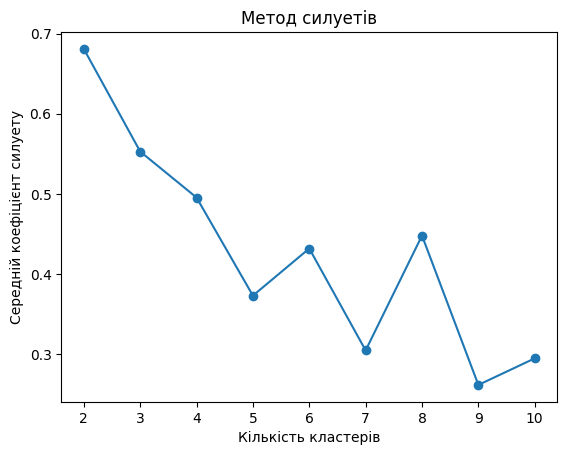

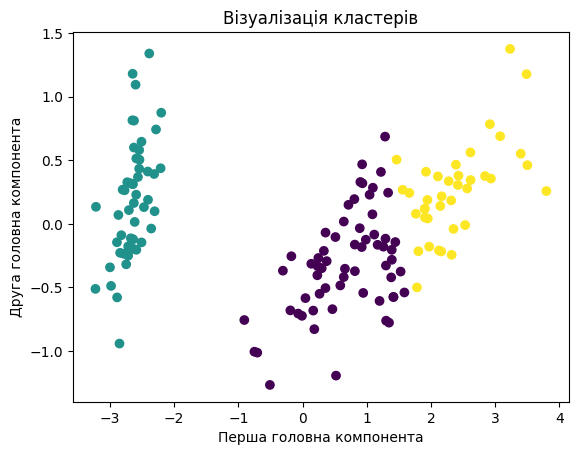

In [ ]:
# Роздрук перших 5 рядків датасету
print(df.head())

# Список для збереження значень інерції
inertia = []

# Обчислення інерції для кількості кластерів від 1 до 10
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Побудова графіку
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

# Список для збереження значень силуету
silhouette_avg = []

# Обчислення середнього коефіцієнта силуету для кількості кластерів від 2 до 10
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg.append(silhouette_score(df, cluster_labels))

# Побудова графіку
plt.plot(range(2, 11), silhouette_avg, marker='o')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній коефіцієнт силуету')
plt.show()




# Оптимальна кількість кластерів (змінюється залежно від методу)
optimal_clusters = 3

# Алгоритм K-середніх
kmeans = KMeans(n_clusters=optimal_clusters)
clusters = kmeans.fit_predict(df)

# Зменшення розмірності для візуалізації
pca = PCA(2)
df_pca = pca.fit_transform(df)

# Візуалізація кластерів
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Візуалізація кластерів')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.show()



In [ ]:
#Висновок: Оптимальна кількість кластерів може змінюватись залежно від методу: методом ліктя оптимальною кількістю є точка згину графіку інерції, а методом силуетів — кількість кластерів з найвищим коефіцієнтом.

In [ ]:
#2 Завдання
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

url = 'Student_data.csv'
df = pd.read_csv(url)

print(df.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [ ]:
# Розмір датасету
print("Розмір датасету:", df.shape)

# Типи даних
print("Типи даних:", df.dtypes)

# Перевірка на пропущені значення
print("Пропущені значення:\n", df.isnull().sum())

# Заповнення пропущених значень середнім за стовпцем
df.fillna(df.mean(), inplace=True)


Розмір датасету: (2392, 15)
Типи даних: StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object
Пропущені значення:
 StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [ ]:
# Перевірка на дублікати
duplicates = df.duplicated().sum()
print("Кількість дублікатів:", duplicates)

# Видалення дублікатів (якщо є)
if duplicates > 0:
    df = df.drop_duplicates()

# Описова статистика
print(df.describe())


Кількість дублікатів: 0
         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971

In [ ]:
#Висновок: Проведений попередній аналіз даних: оброблені пропущені значення, видалені дублікати. Задача класифікації/регресії визначена на основі типу цільової змінної.Проведена кластеризація дозволила візуалізувати внутрішню структуру даних та обрати оптимальну кількість кластерів.
